# Train the model

## Goal:
##### 🔻 Find the best fit model 

## Steps:
    ▼ Prepare the data 
    ▼ Standardize the features and applying 
    ▼ Train the models 
    ▼ Test the models
    ▼ Find the best one by evaluating the models
    ▼ Save models using pickle

In [1]:
import pandas as pd
import numpy as np
import scipy
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import r2_score

In [2]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('../csv_files/result.csv')
df

,Make,Color,Fuel Type,Car Origin,Car License,Transmission Type,Glass,Engine Power,Mileage,Payment Method,Available,Previous Owners,Air Conditioner,Central Locking,Alarm System,CD Player,Sunroof,Alloy Wheels,Leather Seats,Airbag,Passenger Count,age,Price
0,كيا,أسود,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,183000.0,إمكانية التقسيط,للبيع فقط,1,1,1,1,1,0,0,1,1,4,15.0,44000
1,هونداي,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1400,42000.0,نقدا فقط,للبيع أو التبديل,1,1,1,1,0,0,1,1,1,4,10.0,58000
2,بيجو,أسود,بنزين,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2000,85000.0,إمكانية التقسيط,للبيع فقط,2,1,1,1,1,1,1,1,1,4,10.0,40000
3,سكودا,أزرق,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1900,30000.0,إمكانية التقسيط,للبيع أو التبديل,3,1,1,1,1,0,1,1,1,4,13.0,70000
4,سوبارو,رصاصي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1600,41238.2,نقدا فقط,للبيع فقط,2,1,1,1,1,0,1,0,1,4,24.0,33000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6522,فيات,أحمر,بنزين,خصوصي,فلسطينية,عادي,يدوي,1800,50000.0,نقدا فقط,للبيع فقط,7,0,0,0,1,0,0,1,0,4,50.0,27000
6523,هونداي,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,140.0,نقدا فقط,للبيع فقط,1,1,1,1,0,1,1,1,1,6,7.0,117000
6524,هونداي,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1400,40.0,نقدا فقط,للبيع فقط,1,1,1,1,1,0,1,1,1,4,6.0,67000
6525,سكودا,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,60000.0,نقدا فقط,للبيع أو التبديل,2,1,1,1,1,0,1,0,1,4,8.0,58000


##### Prepare data

In [3]:
# Split data into features & target variable 
X = df.drop('Price', axis=1) # Features
Y = df['Price'] # Target variable

In [4]:
categorical_features = df.select_dtypes(['object']).columns.to_list()
numeric_features = X.select_dtypes('number').columns.to_list() # we use x not df because we want transform the price

numeric_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('power_transformer', PowerTransformer())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

<IPython.core.display.Javascript object>

In [5]:
# Standardize features
x_scaled = transformer.fit_transform(X)

In [6]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)

In [7]:
def plot(y_test, y_pred, model_type, hyperparameter_value):
    # Create a single subplot
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the ideal line where predicted = actual
    ax.plot(y_test, y_test, color='blue', linestyle='--', label='Ideal Line')

    # Scatter plot for actual vs predicted prices
    ax.scatter(y_test, y_pred, c='black', label='Actual vs Predicted Prices', alpha=0.7, marker='o')

    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.legend()

    # Include model type and hyperparameter in the title
    title = f'{model_type} - Hyperparameter: {hyperparameter_value}'
    ax.set_title(title)

    plt.show()

##### Save a model to a file

In [8]:
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

#### Polynomial Model

In [9]:
def train_polynomial_model(x_train, y_train, degree):
    # Feature engineering: create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)

    # Train a polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(x_train_poly, y_train)
    
    return poly_model, poly_features

def test_polynomial_model(poly_model, poly_features, x_test, y_test, degree):
    if poly_model is None:
        print("Error: Polynomial Regression model is None.")
        return None, None

    # Feature engineering: Transform test data using the same polynomial features
    x_test_poly = poly_features.transform(x_test)

    # Make predictions on the test set
    y_pred = poly_model.predict(x_test_poly)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    plot(y_test, y_pred, model_type='Polynomial Regression', hyperparameter_value=degree)

    return y_pred, mse

Mean Squared Error: 10828711724.499067


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

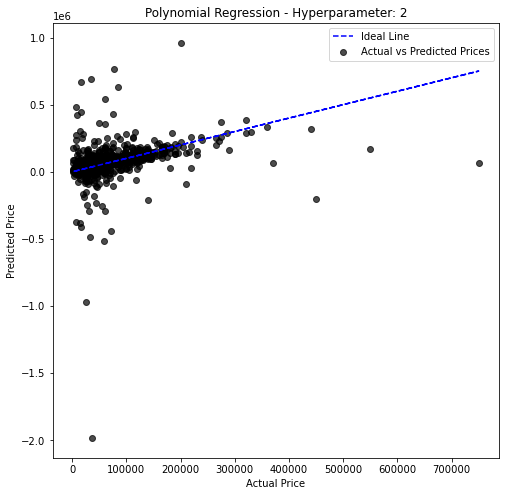

(array([106974.86758516, 120238.25718643, 143402.53163969, ...,
        132552.08991381,  45948.58061061,  75959.24222385]),
 10828711724.499067)

In [10]:
poly_model, poly_features = train_polynomial_model(x_train, y_train, degree=2)
save_model(poly_model, '../pkls/poly_model.pkl')
test_polynomial_model(poly_model, poly_features, x_test, y_test,degree=2)

Mean Squared Error have high value

##### KNN

In [11]:
def train_knn_model(x_train, y_train, n_neighbors):
    # Train a KNN regression model
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(x_train, y_train)
    return knn_model

def test_knn_model(knn_model, x_test, y_test,n_neighbors):
    # Make predictions on the test set
    y_pred = knn_model.predict(x_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    plot(y_test, y_pred, model_type='KNN Regression', hyperparameter_value=n_neighbors)
    return y_pred , mse

Mean Squared Error: 1648919023.6062481


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

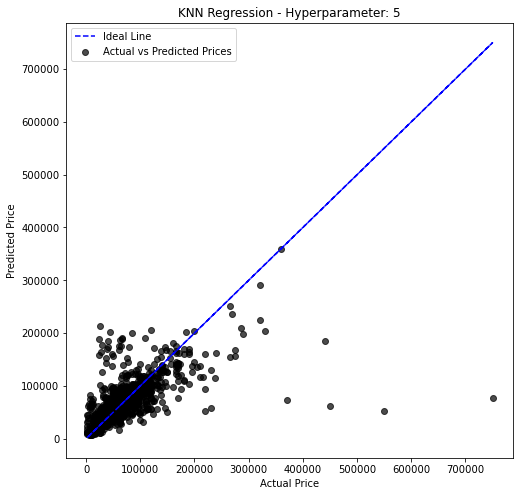

(array([ 84600., 107200., 144000., ..., 104000.,  47000.,  26960.]),
 1648919023.6062481)

In [12]:
knn_model = train_knn_model(x_train, y_train, n_neighbors=5)
save_model(knn_model, '../pkls/knn_model.pkl')
test_knn_model(knn_model, x_test, y_test,n_neighbors=5)

##### Decision Tree

In [13]:
def train_decision_tree_model(x_train, y_train, max_depth):
    # Train a Decision Tree regression model
    dt_model = DecisionTreeRegressor(max_depth=max_depth)
    dt_model.fit(x_train, y_train)

    return dt_model

def test_decision_tree_model(dt_model, x_test, y_test,max_depth):
    if dt_model is None:
        print("Error: Decision Tree model is None.")
        return None, None

    # Make predictions on the test set
    y_pred = dt_model.predict(x_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    plot(y_test, y_pred, model_type='Decision Tree Regression', hyperparameter_value=max_depth)

    return y_pred, mse

Mean Squared Error: 3674590668.267228


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

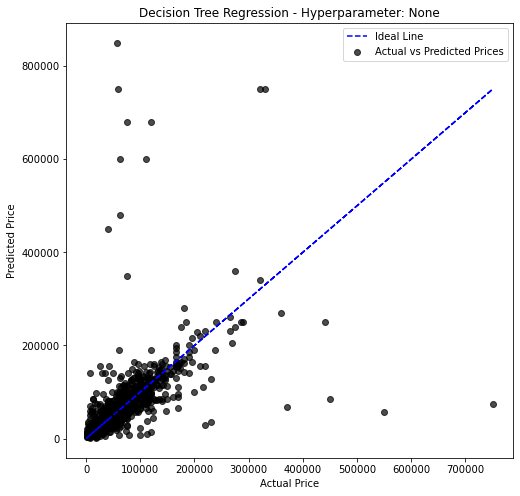

(array([ 68000., 116000., 155000., ..., 140000.,  60000.,  35000.]),
 3674590668.267228)

In [14]:
dt_model = train_decision_tree_model(x_train, y_train, max_depth=None)
save_model(dt_model, '../pkls/dt_model.pkl')
test_decision_tree_model(dt_model, x_test, y_test,max_depth=None)

### Evaluate Models

In [15]:
def evaluate_models(x_train, y_train, x_test, y_test, degrees=[2], n_neighbors=[5], max_depth=[None]):
    best_model = None
    best_mse = float('inf')
    best_type = ""
    heperparmeter = None

    for degree in degrees:
        # Polynomial Regression
        poly_model, poly_features = train_polynomial_model(x_train, y_train, degree)
        y_pred_poly, mse_poly = test_polynomial_model(poly_model, poly_features, x_test, y_test,degree)

        if mse_poly < best_mse:
            best_model = poly_model
            best_mse = mse_poly
            best_type = "Polynomial Regression"
            heperparmeter = degree

    for n_neighbor in n_neighbors:
        # KNN Regression
        knn_model = train_knn_model(x_train, y_train, n_neighbor)
        y_pred_knn, mse_knn = test_knn_model(knn_model, x_test, y_test,n_neighbor)

        if mse_knn < best_mse:
            best_model = knn_model
            best_mse = mse_knn
            best_type = "KNN Regression"
            heperparmeter = n_neighbor

    for depth in max_depth:
        # Decision Tree Regression
        dt_model = train_decision_tree_model(x_train, y_train, depth)
        y_pred_dt, mse_dt = test_decision_tree_model(dt_model, x_test, y_test,depth)

        if mse_dt < best_mse:
            best_model = dt_model
            best_mse = mse_dt
            best_type = "Decision Tree Regression"
            heperparmeter = depth


    if best_model is not None:
        print(f"\nBest Model: {best_type} with Heperparmeter :{heperparmeter} and Mean Squared Error: {best_mse}")
        print("\nComparison of Models:")
        print(f"\nMSE - Polynomial Regression: {mse_poly}")
        print(f"MSE - KNN Regression: {mse_knn}")
        print(f"MSE - Decision Tree Regression: {mse_dt}")
        '''
        print(f"\nR-squared - Polynomial Regression: {r2_poly}")
        print(f"R-squared - KNN Regression: {r2_knn}")
        print(f"R-squared - Decision Tree Regression: {r2_dt}")
        '''

    else:
        print("No suitable model found within the specified hyperparameters.")

    return best_model

Future improvement > add r^2 compression 

Mean Squared Error: 10828711724.499067


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

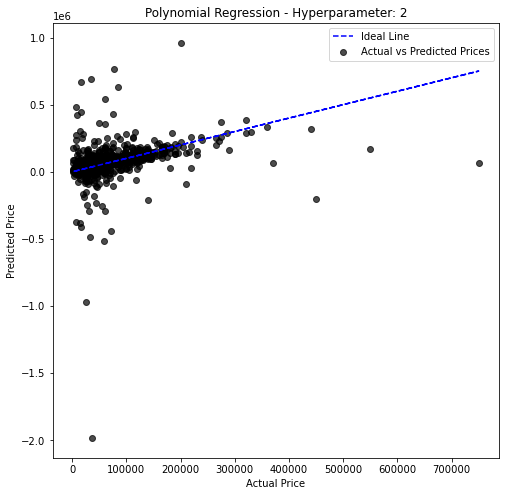

Mean Squared Error: 1648919023.6062481


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

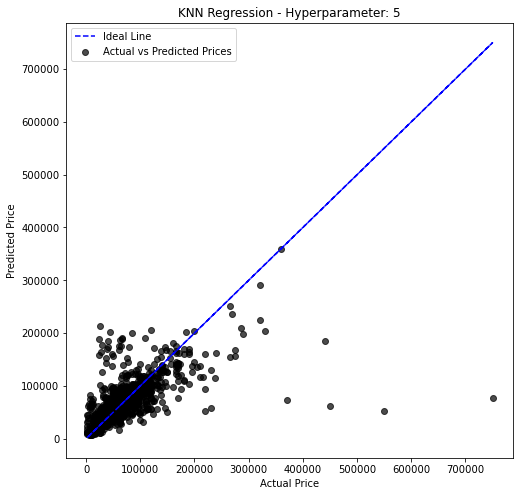

Mean Squared Error: 1527881593.6216922


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

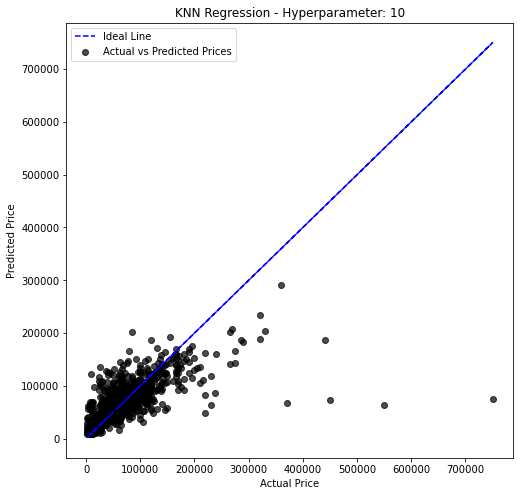

Mean Squared Error: 3373131782.739089


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

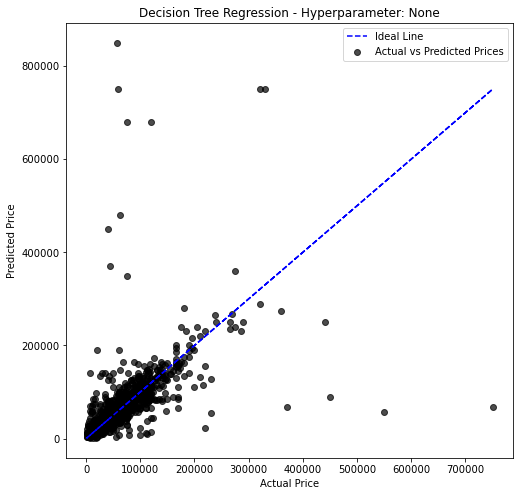

Mean Squared Error: 1427263819.3018844


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

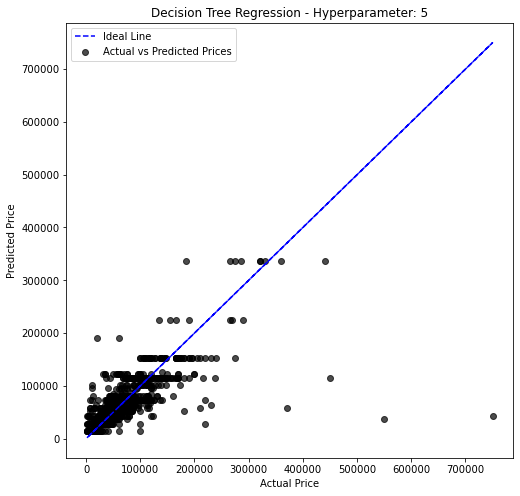

Mean Squared Error: 3194295896.2832713


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

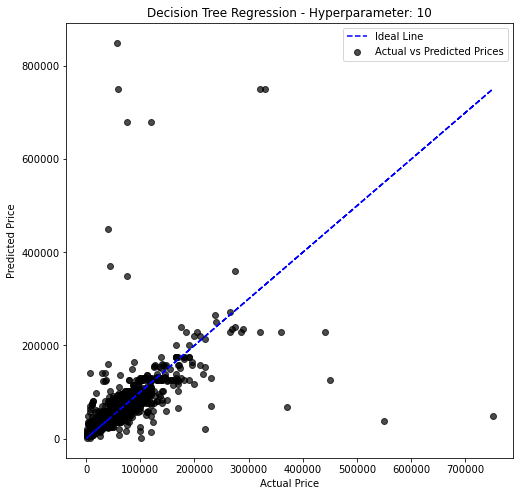


Best Model: Decision Tree Regression with Heperparmeter :5 and Mean Squared Error: 1427263819.3018844

Comparison of Models:

MSE - Polynomial Regression: 10828711724.499067
MSE - KNN Regression: 1527881593.6216922
MSE - Decision Tree Regression: 3194295896.2832713


In [16]:
best_model = evaluate_models(x_train, y_train, x_test, y_test, degrees=[2], n_neighbors=[5, 10], max_depth=[None, 5, 10])
save_model(best_model, '../pkls/best_model.pkl')